# Introducción a Validación de Modelos

Los algoritmos de aprendizaje automático se entrenan mediante la optimizaicón de una función sobre los datos de entrenamiento. Por ende, mal se puede validar la hipótesis aprendida sobre los mismo datos que su usaron para formularla. Si lo hiciéramos, lejos de obtener una métrica adecuada de lo bien que generalizará nuestro modelo, sólo tendríamos una evaluación de qué tan bien se ajusta a los datos de entrenamiento. Cuando ese ajuste es muy fuerte y la generalización es muy mala, se dice que incurrimos en un ajuste exesivo (overfitting).

Exísten una serie de métodos que nos permiten estimar qué tan bien generalizará un determinado modelo. En primer término, la simple división entre entrenamiento y validación puede dar la primera aproximación. Generalizando esta idea, se llega a la técnica de validación cruzada (cross-validation) que es la división en k subconjuntos disyuntos de entrenamiento y validación. Llevado al extremo, tenemos los métodos de dejar-p-afuera (leave p out), que cuando p=1, implica el entrenamiento de n modelos para precedir en cada uno de los casos, habiendo entrenado en todos los demás. 


## Separación simple en entrenamiento y validación

En el tutorial anterior, vimos un ejemplo de tomar un p% de casos al azar para validación, entrenando con el restante (1-p)%. Ese fue un caso de simple separación aleatoria entre entrenamiento y validación. 

Scikit Learn es una librería que no sólo tiene una amplia variedad de algoritmos de aprendizaje automático, sino que provee una gran cantidad de funciones auxiliares para simplificar el tratamiento de los datos, entre ellas, las de validación. 


In [1]:
import numpy as np
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
sns.set()

In [2]:
#setup para el notebook

%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
data = pd.read_csv("../data/titanic_proc.csv", index_col="PassengerId")
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.00,1,0,0,7.25,0,1,0,0,1,0
2,1,1,1,38.00,1,0,1,71.28,1,1,1,0,0,0
3,1,3,1,26.00,0,0,2,7.92,0,0,0,0,1,0
4,1,1,1,35.00,1,0,3,53.10,2,1,0,0,1,0
5,0,3,0,35.00,0,0,4,8.05,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.00,0,0,677,13.00,0,0,0,0,1,0
888,1,1,1,19.00,0,0,678,30.00,146,0,0,0,1,0
889,0,3,1,29.70,1,2,614,23.45,0,3,0,0,1,1


In [4]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(data.drop("Survived", axis=1), 
                                                                    data.Survived, test_size=0.1, random_state=0)
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,
816,1,0,29.70,0,0,634,0.00,138,0,0,0,1,1
878,3,0,19.00,0,0,671,7.90,0,0,0,0,1,0
194,2,0,3.00,1,1,137,26.00,27,2,0,0,1,0
524,1,1,44.00,0,1,290,57.98,63,1,1,0,0,0
635,3,1,9.00,3,2,62,27.90,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,1,39.00,1,1,645,83.16,140,2,1,0,0,0
193,3,1,19.00,1,0,174,7.85,0,1,0,0,1,0
630,3,0,29.70,0,0,512,7.73,0,0,0,1,0,1


In [5]:
y_train

PassengerId
816    0
878    0
194    1
524    1
635    0
      ..
836    1
193    1
630    0
560    1
685    0
Name: Survived, dtype: int64

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((801, 13), (801,), (90, 13), (90,))

In [7]:
depths = list(range(2, 40, 2)) + [None]
depths

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, None]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score

In [9]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
res

,train,valid
2,NaN,NaN
4,NaN,NaN
6,NaN,NaN
8,NaN,NaN
10,NaN,NaN
...,...,...
32,NaN,NaN
34,NaN,NaN
36,NaN,NaN
38,NaN,NaN


In [10]:
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = log_loss(y_train, learner.predict_proba(X_train))
    res.loc[str(depth), "valid"] = log_loss(y_valid, learner.predict_proba(X_valid))

In [11]:
res

,train,valid
2,0.51,0.48
4,0.42,0.40
6,0.34,0.37
8,0.26,0.37
10,0.20,0.39
...,...,...
32,0.11,0.40
34,0.11,0.41
36,0.11,0.39
38,0.11,0.41


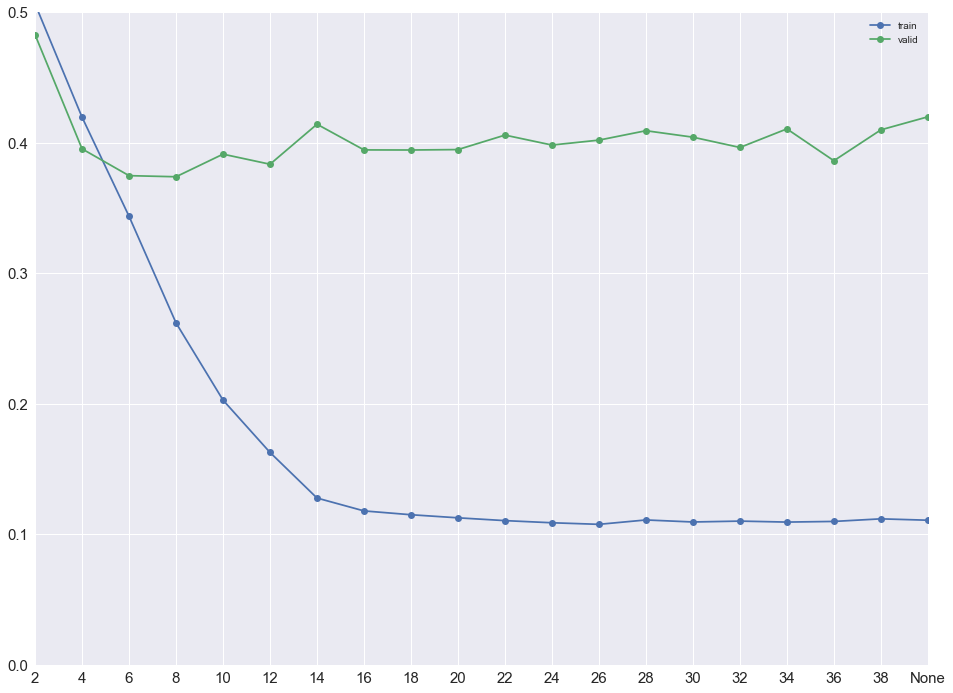

In [12]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 0.5), linestyle='-', style='o')
ax.set_xticks(range(len(res)))
ax.set_xticklabels(res.index)

In [13]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[str(depth), "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [14]:
res

,train,valid
2,0.85,0.92
4,0.89,0.94
6,0.93,0.94
8,0.97,0.92
10,0.99,0.90
...,...,...
32,1.00,0.89
34,1.00,0.90
36,1.00,0.89
38,1.00,0.90


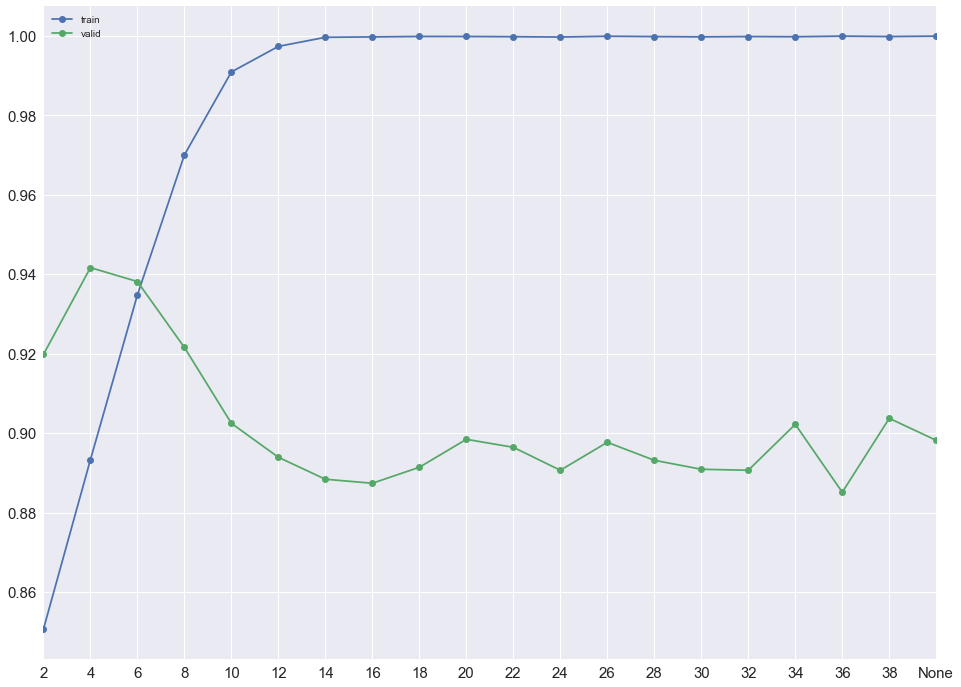

In [15]:
ax = res.plot.line(grid=True, fontsize=15, linestyle='-', style='o')
ax.set_xticks(range(len(res)))
ax.set_xticklabels(res.index)

In [16]:
#nota: ¿qué pasaría con el log_loss? ¿y con la precisión?
pd.crosstab(pd.cut(learner.predict_proba(X_train)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_train)

Survived,0,1
row_0,,
"(0.1, 0.2]",101,0
"(0.2, 0.3]",35,0
"(0.3, 0.4]",9,0
"(0.4, 0.5]",1,0
"(0.5, 0.6]",0,2
"(0.6, 0.7]",1,36
"(0.7, 0.8]",0,40


In [17]:
#nota: observar que quitamos el "casting" a str
trees = list(range(10, 100, 10))
trees = trees + list(range(100, 1000, 100))
res = pd.DataFrame([], index=[d for d in trees], columns=["train", "valid"])
for tree in trees:
    learner = RandomForestClassifier(n_estimators=tree, max_depth=6)
    learner.fit(X_train, y_train)
    res.loc[tree, "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[tree, "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [18]:
res

,train,valid
10,0.93,0.93
20,0.93,0.94
30,0.93,0.94
40,0.93,0.94
50,0.94,0.94
...,...,...
500,0.94,0.94
600,0.93,0.94
700,0.94,0.94
800,0.94,0.94


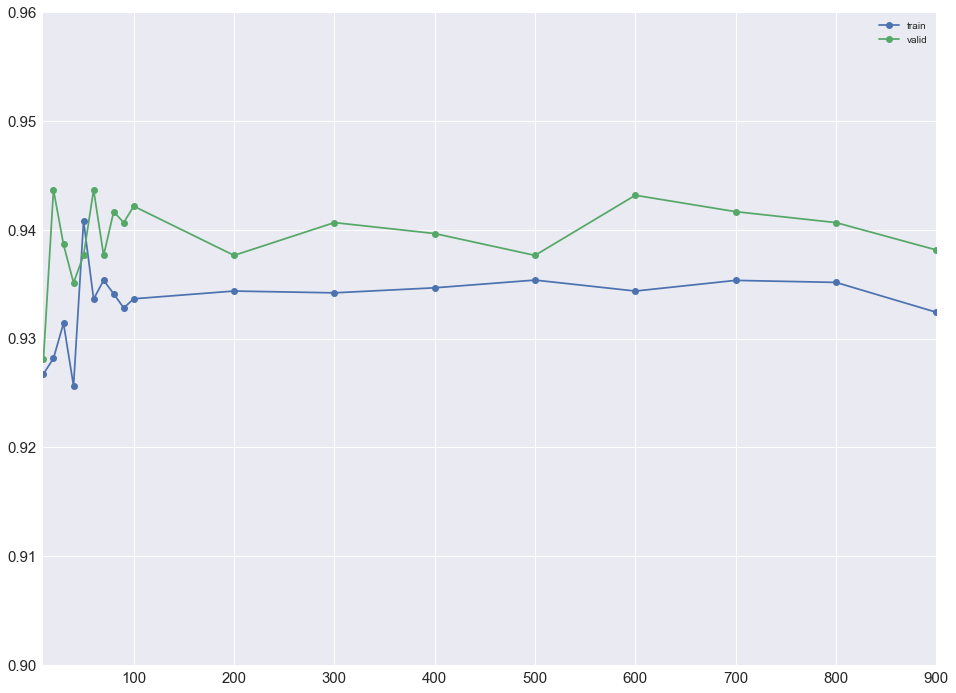

In [19]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0.9, 0.96), linestyle='-', style='o')

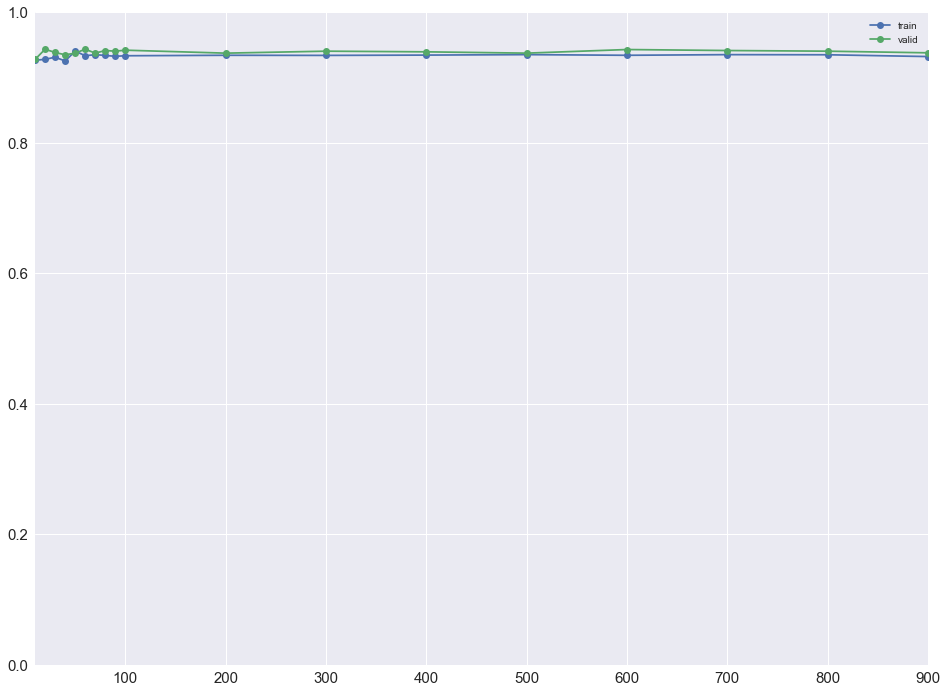

In [20]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 1), linestyle='-', style='o')

## Validación Cruzada en K conjuntos (K-fold cross validation)

Este método consiste en dividir el set de entrenamiento en K subconjuntos disyuntos, para luego iterativamente entrenar el algoritmo en k-1 partes y evaluar en la restante. 

Scikit Learn también tiene funciones para hacer estas divisiones


In [21]:
kf = model_selection.KFold(n_splits=5)
folds = [(data.iloc[train_idx].index, data.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(data)]
folds[0]

(Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
             ...
             882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
            dtype='int64', name='PassengerId', length=712),
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
            dtype='int64', name='PassengerId', length=179))

In [22]:
folds[0][0].shape, folds[0][1].shape

((712,), (179,))

In [23]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid"])

for depth in depths:
    valid_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = data.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = data.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
        learner.fit(X_train, y_train)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(data.loc[valid_probs.index, "Survived"], valid_probs)

In [24]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
2,0.80,0.84,0.86,0.86,0.89,0.85
4,0.82,0.84,0.88,0.88,0.91,0.86
6,0.85,0.84,0.88,0.88,0.92,0.87
8,0.85,0.84,0.88,0.88,0.91,0.87
10,0.85,0.84,0.89,0.88,0.92,0.87
...,...,...,...,...,...,...
32,0.83,0.83,0.89,0.88,0.90,0.86
34,0.83,0.83,0.89,0.87,0.91,0.86
36,0.83,0.84,0.89,0.88,0.91,0.86
38,0.83,0.83,0.89,0.88,0.90,0.86


In [25]:
res.sort_values("valid", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
8,0.85,0.84,0.88,0.88,0.91,0.87
10,0.85,0.84,0.89,0.88,0.92,0.87
6,0.85,0.84,0.88,0.88,0.92,0.87
30,0.84,0.83,0.89,0.88,0.91,0.86
22,0.84,0.83,0.89,0.88,0.90,0.86
...,...,...,...,...,...,...
38,0.83,0.83,0.89,0.88,0.90,0.86
32,0.83,0.83,0.89,0.88,0.90,0.86
16,0.84,0.83,0.88,0.88,0.91,0.86
20,0.83,0.83,0.88,0.88,0.90,0.86


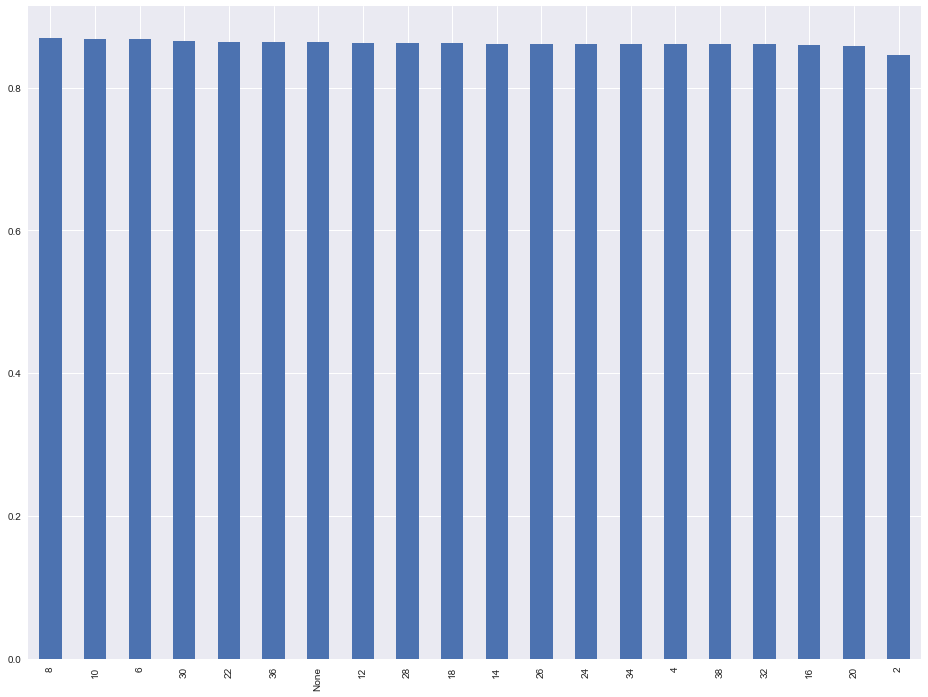

In [26]:
#diagrama de "pareto"
res.sort_values("valid", ascending=False).valid.plot.bar()

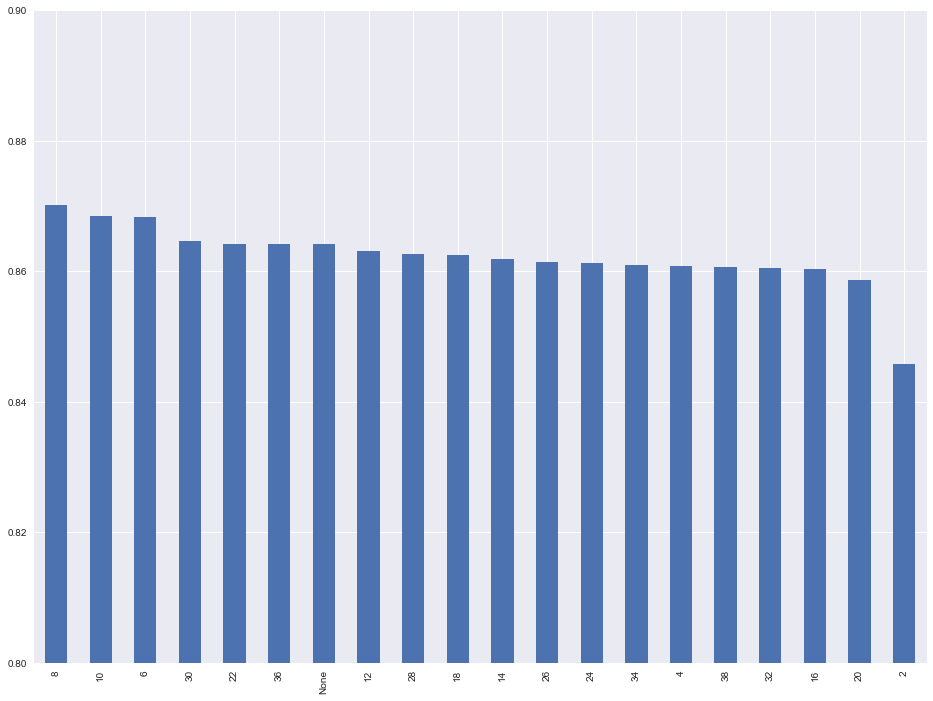

In [27]:
res.sort_values("valid", ascending=False).valid.plot.bar(ylim=(0.8, 0.9))

## Combinación de métodos  y determinación de cantidad de iteraciones

Ambos métodos se pueden combinar para hacer una estimación mas completa, con el beneficio agregado que, para algunso tipos de algoritmos, se puede facilitar la estimación de la cantidad de iteraciones (ej. boosting o redes neuronales)


In [28]:
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
816,0,1,0,29.70,0,0,634,0.00,138,0,0,0,1,1
878,0,3,0,19.00,0,0,671,7.90,0,0,0,0,1,0
194,1,2,0,3.00,1,1,137,26.00,27,2,0,0,1,0
524,1,1,1,44.00,0,1,290,57.98,63,1,1,0,0,0
635,0,3,1,9.00,3,2,62,27.90,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,1,1,39.00,1,1,645,83.16,140,2,1,0,0,0
193,1,3,1,19.00,1,0,174,7.85,0,1,0,0,1,0
630,0,3,0,29.70,0,0,512,7.73,0,0,0,1,0,1


In [29]:
kf = model_selection.KFold(n_splits=5)
folds = [(train.iloc[train_idx].index, train.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(train)]
folds[0]

(Int64Index([334, 699, 482,  72,  50, 574, 339, 262, 117,  77,
             ...
             724,  10, 360, 708, 764, 836, 193, 630, 560, 685],
            dtype='int64', name='PassengerId', length=640),
 Int64Index([816, 878, 194, 524, 635, 532, 248, 267, 695, 682,
             ...
             821, 383,  21, 586,  66, 681, 879, 305, 824, 522],
            dtype='int64', name='PassengerId', length=161))

In [30]:
from xgboost import XGBClassifier

C:\Users\rcrescenzi\Documents\utils\python\WinPython-64bit-3.5.3.0Qt5\python-3.5.3.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid", "test"])

for depth in depths:
    valid_probs = []
    test_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = train.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = train.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = XGBClassifier(n_estimators=10000, max_depth=depth)
        learner.fit(X_train, y_train,  early_stopping_rounds=10, eval_metric="auc",
                    eval_set=[(X_train, y_train),
                              (test.drop("Survived", axis=1), test.Survived),
                              (X_valid, y_valid)])
        probs = pd.Series(learner.predict_proba(X_valid, ntree_limit=learner.best_ntree_limit)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
        probs = pd.Series(learner.predict_proba(test.drop("Survived", axis=1), ntree_limit=learner.best_ntree_limit)[:, -1], index=test.index, name="fold_" + str(i))
        test_probs.append(probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(train.loc[valid_probs.index, "Survived"], valid_probs)
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    res.loc[str(depth), "test"] = roc_auc_score(test.loc[test_probs.index, "Survived"], test_probs)

[0]	validation_0-auc:0.814881	validation_1-auc:0.830317	validation_2-auc:0.831225
Multiple eval metrics have been passed: 'validation_2-auc' will be used for early stopping.

Will train until validation_2-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.841376	validation_1-auc:0.917547	validation_2-auc:0.839659
[2]	validation_0-auc:0.844285	validation_1-auc:0.917547	validation_2-auc:0.843033
[3]	validation_0-auc:0.846483	validation_1-auc:0.921066	validation_2-auc:0.84278
[4]	validation_0-auc:0.846483	validation_1-auc:0.921066	validation_2-auc:0.84278
[5]	validation_0-auc:0.847102	validation_1-auc:0.921317	validation_2-auc:0.843792
[6]	validation_0-auc:0.847102	validation_1-auc:0.921317	validation_2-auc:0.843792
[7]	validation_0-auc:0.847102	validation_1-auc:0.921317	validation_2-auc:0.843792
[8]	validation_0-auc:0.84768	validation_1-auc:0.925088	validation_2-auc:0.844045
[9]	validation_0-auc:0.84768	validation_1-auc:0.925088	validation_2-auc:0.844045
[10]	validation_0-auc:0.847

XGBoostError: b"Invalid Parameter format for max_depth expect int but value='None'"

In [33]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.85,0.88,0.85,0.90,0.86,0.96
4,0.89,0.84,0.90,0.82,0.88,0.87,0.94
6,0.91,0.85,0.89,0.84,0.86,0.84,0.93
8,0.90,0.85,0.90,0.81,0.86,0.85,0.92
10,0.90,0.83,0.90,0.82,0.86,0.84,0.92
...,...,...,...,...,...,...,...
32,0.91,0.83,0.90,0.82,0.86,0.85,0.92
34,0.91,0.83,0.90,0.82,0.86,0.85,0.92
36,0.91,0.83,0.90,0.82,0.86,0.85,0.92
38,0.91,0.83,0.90,0.82,0.86,0.85,0.92


In [34]:
res = res.drop("None")
res.sort_values("test", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.85,0.88,0.85,0.90,0.86,0.96
4,0.89,0.84,0.90,0.82,0.88,0.87,0.94
6,0.91,0.85,0.89,0.84,0.86,0.84,0.93
14,0.91,0.83,0.90,0.82,0.86,0.86,0.92
10,0.90,0.83,0.90,0.82,0.86,0.84,0.92
...,...,...,...,...,...,...,...
18,0.91,0.83,0.90,0.82,0.86,0.85,0.92
38,0.91,0.83,0.90,0.82,0.86,0.85,0.92
16,0.91,0.83,0.90,0.82,0.86,0.85,0.92
12,0.90,0.83,0.90,0.82,0.86,0.84,0.92


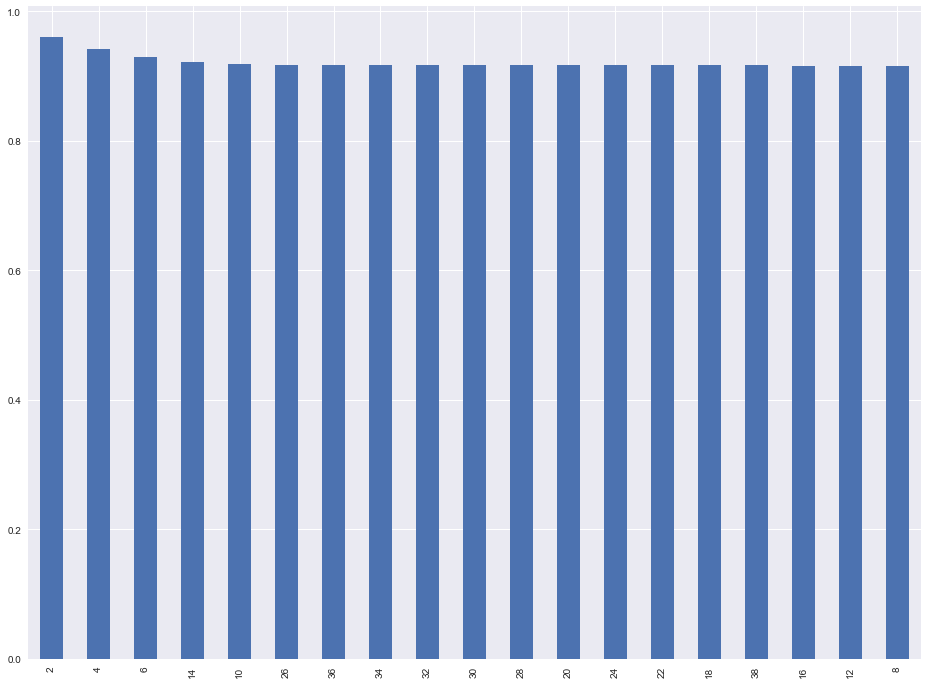

In [35]:
res.sort_values("test", ascending=False).test.plot.bar()

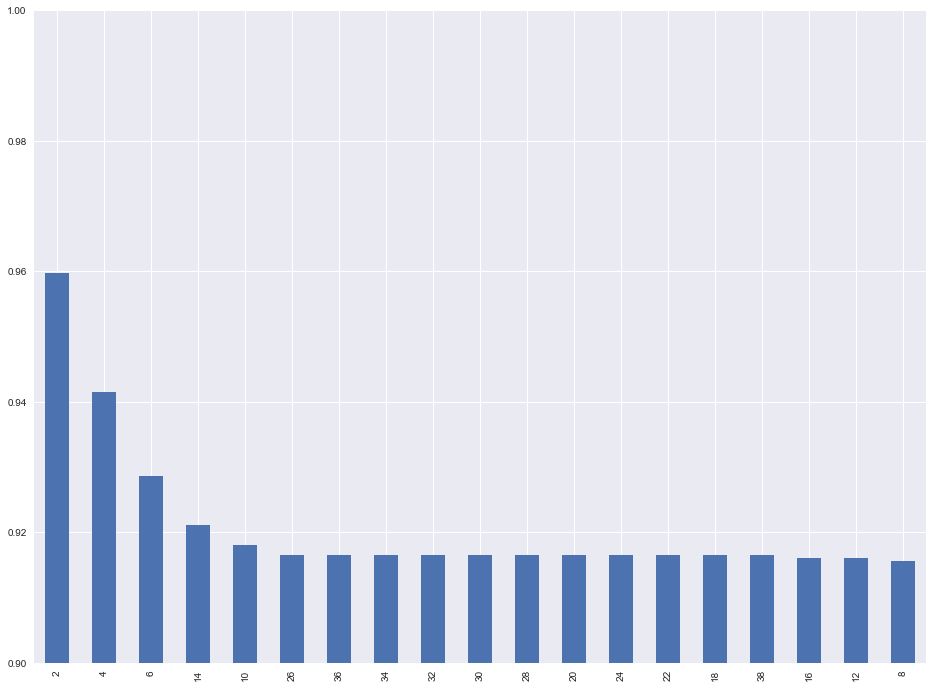

In [36]:
res.sort_values("test", ascending=False).test.plot.bar(ylim=(0.9, 1))

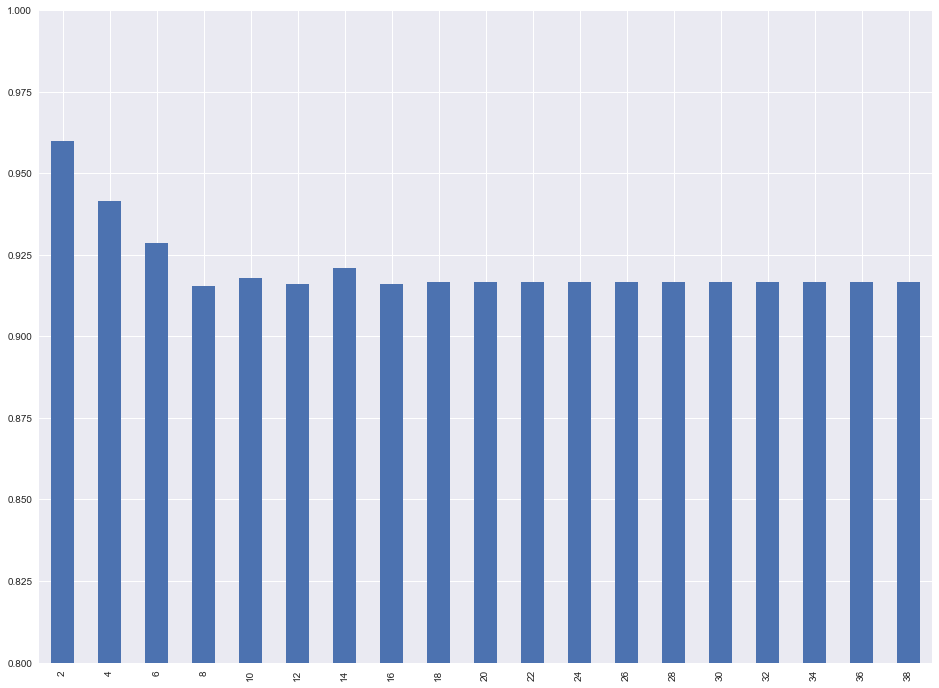

In [37]:
res.test.plot.bar(ylim=(0.8, 1))

In [38]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid", "test"])

for depth in depths:
    valid_probs = []
    test_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        print("doing fold {0} of depth {1}".format(i + 1, str(depth)))
        X_train = train.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = train.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = RandomForestClassifier(n_estimators=100, max_depth=depth, n_jobs=-1)
        learner.fit(X_train, y_train)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
        probs = pd.Series(learner.predict_proba(test.drop("Survived", axis=1))[:, -1], index=test.index, name="fold_" + str(i))
        test_probs.append(probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(train.loc[valid_probs.index, "Survived"], valid_probs)
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    res.loc[str(depth), "test"] = roc_auc_score(test.loc[test_probs.index, "Survived"], test_probs)

doing fold 1 of depth 2
doing fold 2 of depth 2
doing fold 3 of depth 2
doing fold 4 of depth 2
doing fold 5 of depth 2
doing fold 1 of depth 4
doing fold 2 of depth 4
doing fold 3 of depth 4
doing fold 4 of depth 4
doing fold 5 of depth 4
doing fold 1 of depth 6
doing fold 2 of depth 6
doing fold 3 of depth 6
doing fold 4 of depth 6
doing fold 5 of depth 6
doing fold 1 of depth 8
doing fold 2 of depth 8
doing fold 3 of depth 8
doing fold 4 of depth 8
doing fold 5 of depth 8
doing fold 1 of depth 10
doing fold 2 of depth 10
doing fold 3 of depth 10
doing fold 4 of depth 10
doing fold 5 of depth 10
doing fold 1 of depth 12
doing fold 2 of depth 12
doing fold 3 of depth 12
doing fold 4 of depth 12
doing fold 5 of depth 12
doing fold 1 of depth 14
doing fold 2 of depth 14
doing fold 3 of depth 14
doing fold 4 of depth 14
doing fold 5 of depth 14
doing fold 1 of depth 16
doing fold 2 of depth 16
doing fold 3 of depth 16
doing fold 4 of depth 16
doing fold 5 of depth 16
doing fold 1 of dept

In [39]:
res.sort_values("test", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
6,0.88,0.83,0.88,0.84,0.88,0.86,0.94
4,0.88,0.81,0.87,0.83,0.88,0.85,0.94
8,0.89,0.83,0.89,0.83,0.87,0.86,0.93
2,0.87,0.80,0.86,0.82,0.87,0.84,0.93
10,0.90,0.83,0.89,0.83,0.87,0.86,0.92
...,...,...,...,...,...,...,...
20,0.90,0.82,0.90,0.83,0.85,0.86,0.90
14,0.90,0.82,0.90,0.83,0.85,0.86,0.90
None,0.89,0.82,0.90,0.83,0.85,0.86,0.90
36,0.90,0.82,0.90,0.84,0.86,0.86,0.90


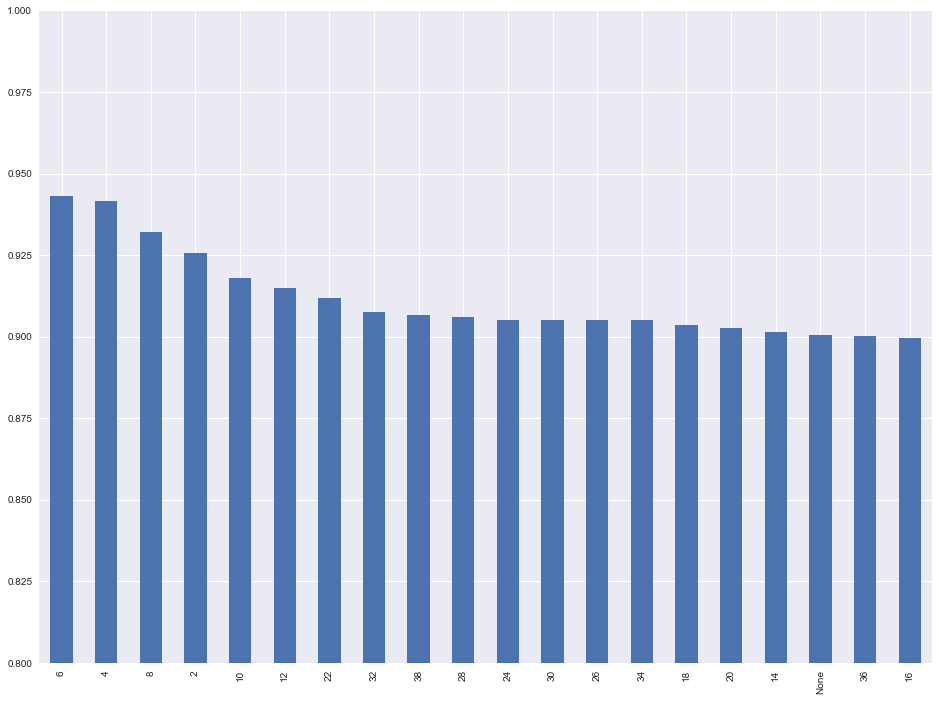

In [40]:
res.sort_values("test", ascending=False).test.plot.bar(ylim=(0.8, 1))

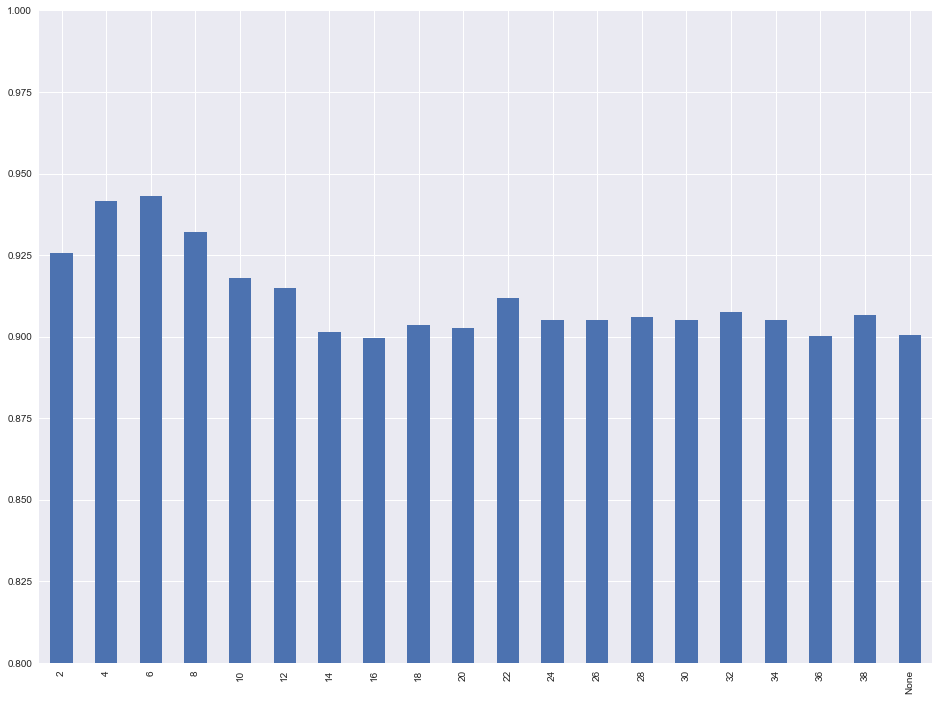

In [41]:
res.test.plot.bar(ylim=(0.8, 1))